<a href="https://colab.research.google.com/github/Ark1645/Deep-Learning/blob/main/cub_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d wenewone/cub2002011

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!ls

drive  sample_data


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.applications import ResNet50

import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau
import tensorflow as tf


In [7]:
img_width = 64
img_height = 64
batch_size = 64

In [8]:
p="/content/drive/MyDrive/Machine_Learning_Datas/CUB_200_2011/images"

In [9]:
def prefucn(image):
    image = tf.image.resize(image, (64, 64))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=1 - 0.2, upper=1 + 0.2)
    image = tf.image.random_saturation(image, lower=1 - 0.2, upper=1 + 0.2)
    image = tf.image.random_hue(image, max_delta=0.2)
    return image

In [10]:
train_datagen = ImageDataGenerator(preprocessing_function=prefucn,
    rescale=1/255,
     validation_split=0.1
    )

In [ ]:
from zipfile import ZipFile

dataset = '/content/cub2002011.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [11]:
train_generator = train_datagen.flow_from_directory(
    p,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 10649 images belonging to 200 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
    p,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 1139 images belonging to 200 classes.


In [13]:
IMAGE_SIZE=[64,64]

In [14]:
from tensorflow.keras import layers, models

In [19]:
res=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
for layer in res.layers:
  layers.trainable=False

In [16]:
res = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze some layers for transfer learning
for layer in res.layers[:100]:  # Freeze the first 100 layers
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(res)
model.add(layers.GlobalAveragePooling2D())
model.add(Dense(200, activation='softmax'))

In [25]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras import regularizers

In [26]:
model=Sequential()
model.add(res)  # Assuming 'res' is your pre-trained model (if applicable)
model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [2,2]))

model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [1,1]))

model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [1,1]))

model.add(GlobalAveragePooling2D())  # Added GAP layer

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(200, activation = 'softmax'))
#model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [27]:
print('Model Created')
model.summary()


Model Created
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 conv2d_24 (Conv2D)          (None, 2, 2, 16)          294928    
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 32)          4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 1, 1, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 1, 1, 32)          9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 1, 1, 64)          18496     
                                        

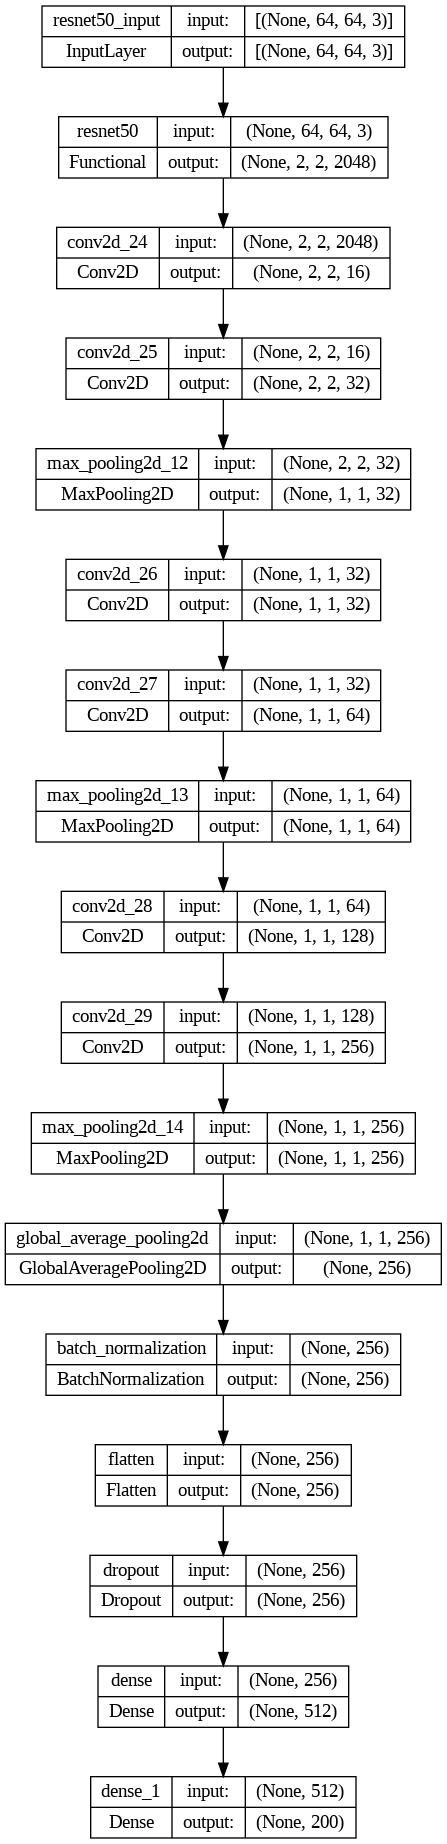

In [28]:
import keras
keras.utils.plot_model(model, show_shapes=True)

In [29]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 conv2d_24 (Conv2D)          (None, 2, 2, 16)          294928    
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 32)          4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 1, 1, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 1, 1, 32)          9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 1, 1, 64)          18496     
                                                      

In [30]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
import keras
from keras.callbacks import ModelCheckpoint


model_path = '/content/callback_cub/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    epochs = 150,
    callbacks=callbacks_list
    )

Epoch 1/150
  5/166 [..............................] - ETA: 53:40 - loss: 5.6272 - accuracy: 0.0031

In [ ]:
import os
file_names = os.listdir('/content/CUB_200_2011/images')
print(file_names)

In [ ]:
loss, accuracy = model.evaluate(train_generator)
print('training loss:', loss)
print('training accuracy:', accuracy)

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

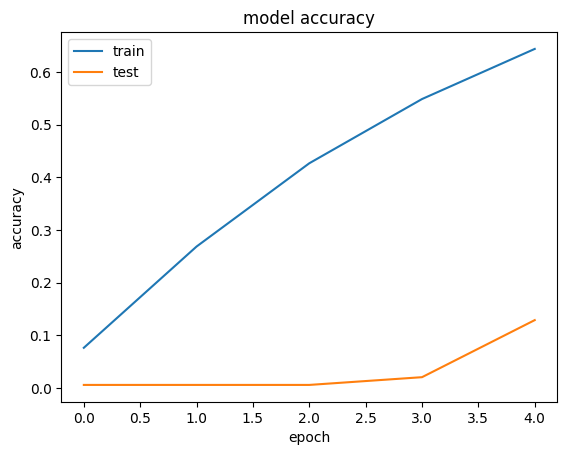

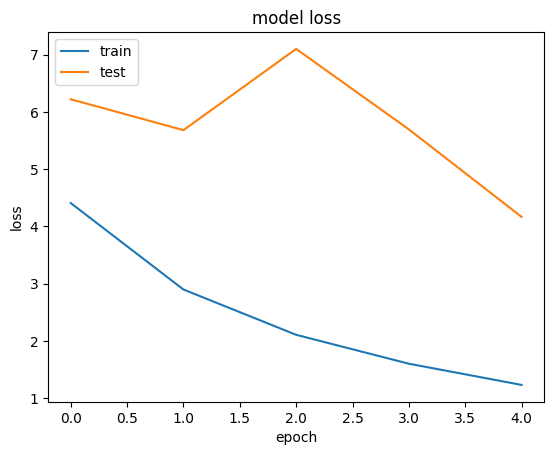

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/CUBDATASET")